<a href="https://colab.research.google.com/github/rpradata-ud/DSPS_RPradata/blob/main/HW/HW4/Problem2HW4DSPS_RPradata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pylab as pl
#!pip install astropy
import scipy as sc


%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['isin', 'var', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [32]:
#I first had f=likelihood * prior, but the RH side is actually convoluted. so we directly do f = desired function.
#f is out desired "set" Gaussian distribution with mean=2, variance = 2
#in this case, the desired function is the Gaussian with mean 2 and variance 2.

#first generate the samples
mean = 2
var = 2

# np.random.seed(320)

# x = np.random.rand(10000)

z = np.linspace(-2.5, 6)
p = sc.stats.norm.pdf(z, loc=mean, scale=var)

#note to self: instead of doing random.seed() and random.rand(),



In [25]:
#make condition for the MH MCMC, as described in the problem

def isin(x_init, N):

  x = x_init
  sample_list=np.array([x_init])

  for n in range(N-1):


    # x_prop = sc.stats.norm.pdf(x, loc = x, scale = 1) #this is defined for q(x'|x) #not true
    x_prop = sc.stats.norm.rvs(loc = x, scale = 1) #this is defined for q(x'|x)

    f_current = sc.stats.norm.pdf(x, loc = mean, scale = var)
    f_prop = sc.stats.norm.pdf(x_prop, loc = mean, scale = var) #instead of previously convoluted f definition.


    r = np.random.uniform()
    cond = (f_prop) / (f_current)
    if cond > r:
      x = x_prop
      sample_list = np.append(sample_list, x_prop)
 #otherwise, it is repeated.

    else:
    # x = x_init
      sample_list = np.append(sample_list, x)

  return sample_list


#another note to self: instead of making the q(x'|x) distribution function as sc.stats.norm.pdf, it needs to be random variated.
#so instead, we could use np.random.normal or sc.stats.norm.rvs




In [26]:
samples = isin(0, 10000)

samples

array([ 0.        , -0.13023716,  0.03580766, ...,  0.83926782,
       -0.03675513,  0.04074368])

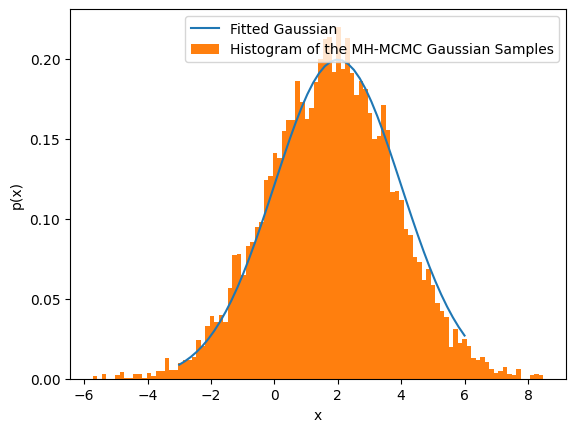

In [31]:
plt.plot(z, p, zorder=2, label='Fitted Gaussian')
plt.hist(samples, bins = 100, density = True, label="Histogram of the MH-MCMC Gaussian Samples")

plt.xlabel("x")
plt.ylabel('p(x)')

plt.legend()

plt.show()



Figure 1: Histogram of the samples run by the MH-MCMC sampler; with mean x and variance 1, with the proposal distribution of a Gaussian. The "Gaussian fit" with mean = 2 and variance = 2 is plotted above it.

The (histogram) results of the MH-MCMC sampler do clearly seem to approach  that of the Gaussian distribution defined as the sampler density function.

In [28]:
#^understanding this was hard

#and it was also quite difficult to explain it (and physically make sense of it), because I'm still new to this technique
#the hard part for me was generating the code

#CODING NOTES FOR SELF-LEARNING:

#initial working:

# #sampler

# #"parameter": the gaussian function pdf of x

# #so sampler has a density function and a proposal distribution

# np.random.seed(320)

# x = np.random.rand(10000)

# # p = sc.stats.norm.pdf(x, loc=2, scale=2)

##
# #about "data"...?

# def isin(data, N, x_current, prop_var):
#   #so will have likelihood * prior? q(x'|x)*p(x). based on Section 3 p.7, this is the f(x) function.
#   sampler_list=[x_current]
#   for n in range(N):

#     # x_current
#     # sampler_list=[x_current]

#   # mu_prop = x_current

#   #q(x'|x) is to suggest a new position
#     x_prop = sc.stats.norm.rvs(loc=x_current, scale=prop_var)



#     prior_current = sc.stats.norm.pdf(x_current, loc = 2, scale=2)
#     prior_prop = sc.stats.norm.pdf(x_prop, loc=2, scale=2)

#   #for priors, is p(x)
#   #^this, we had to have to sample in single parameter x which has density function p(x)
#     likelihood_current = sc.stats.norm.pdf(data, loc = 2, scale=2)
#     likelihood_prop = sc.stats.norm.pdf(data, loc =2, scale = 2)


#   #for likelihoods?

#   #
#     f_current = prior_current * likelihood_current
#     f_proposal = prior_prop * likelihood_prop

#     cond = (f_proposal/f_current).any()

#     if cond > np.random.rand():
#       x_current = x_prop

#     sampler_list = np.append(sampler_list, x_prop)

#   return sampler_list
##^extra reading from https://twiecki.io/blog/2015/11/10/mcmc-sampling/

# posterior = isin(x, 10000, 0, 1)

# fig, ax = plt.subplots()
# ax.plot(posterior)

# plt.hist(posterior)
# plt.show()

#^wouldn't give the desired graph. histograms would look choppy.

#turns out, part of the problem was that I was very convoluted on the idea of the function f.
#the section was describing f = prior * posterior

In [29]:
#then, trying another method (edited)

# # mean = 2
# # var = 2

# # np.random.seed(320)

# # z = np.random.rand(10000)

# z = np.linspace(-2.5, 6)

# #^won't give right graph for a x vs p(x) pdf graph. instead, use np.linspace.
# #initially, was not giving the graph I wanted for a pdf
# p = sc.stats.norm.pdf(z, loc=mean, scale=var)

# #instead, use method like the one in class

# def isin(f_current, f_prop):
#   r = np.random.uniform()
#   cond = (f_prop) / (f_current)
#   if cond > r:
#     return True
#   return False

##^ is alternative to what i did above

# #now generate this for N times, to calculate x_prop

# N = 10000
# x_init = 0

# x = x_init

# sampled_x = []

# for n in range(N):
#   #define q function
#   sampled_x.append(x)
#   # x_prop = sc.stats.norm.pdf(x, loc = x, scale = 1)
#   x_prop = np.random.normal(loc = x, scale = 1)
#   f_current = sc.stats.norm.pdf(x, loc=2, scale=2)
#   f_prop = sc.stats.norm.pdf(x_prop, loc=2, scale = 2)
#   k = isin(f_current, f_prop)
#   if k == True:
#     x = x_prop
#     # sampled_x = np.append(sampled_x, x_prop)
#   else:
#     # sampled_x = np.append(sampled_x, x)
#     x = x


# #^THE KEY WAS TO USE NP.RANDOM.NORM INSTEAD OF SC.STATS.NORM.PDF to generate q

# print(sampled_x)

# #ok good not the same all

##plotting:
# plt.plot(z, p, zorder=2, label='Fitted Gaussian')
# plt.hist(sampled_x, bins = 100, density = True, label="Histogram of the MH-MCMC Gaussian Samples")

# plt.xlabel("x")
# plt.ylabel('p(x)')

# plt.legend()

# plt.show()

# #explain Mean and Variance in figure caption
